## training the model using extra trees classifier

In [6]:
import zipfile
import os

zip_path = "soil-classification.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("soil-classification")

preprocessing

In [7]:
import os       #histogram
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Paths
TRAIN_DIR = '/content/soil-classification/soil_classification-2025/train'
CSV_FILE = '/content/soil-classification/soil_classification-2025/train_labels.csv'

# Function to extract color histogram features
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Image not found or cannot be read.")
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Compute color histogram
        hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        return hist

    except Exception as e:
        print(f"Error: {image_path} => {e}")
        return None

df = pd.read_csv(CSV_FILE)
features, labels = [], []

for _, row in df.iterrows():
    img_path = os.path.join(TRAIN_DIR, row['image_id'])
    hist = extract_color_histogram(img_path)
    if hist is not None:
        features.append(hist)
        labels.append(row['soil_type'])

# convert to numpy array
features = np.array(features)

# ecoding labels
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

print("Features shape:", features.shape)
print("Encoded Labels shape:", encoded_labels.shape)

Features shape: (1222, 512)
Encoded Labels shape: (1222,)


Extra trees classifier for classification

In [8]:
from sklearn.model_selection import train_test_split         #95.10%
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

#split
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Train Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Optional: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.10%


creating confusion matrix

Test Accuracy: 0.9510
Classification Report:
                precision    recall  f1-score   support

Alluvial soil       0.95      0.98      0.97       106
   Black Soil       0.88      0.97      0.93        39
    Clay soil       1.00      0.83      0.91        48
     Red soil       0.96      0.98      0.97        52

     accuracy                           0.95       245
    macro avg       0.95      0.94      0.94       245
 weighted avg       0.95      0.95      0.95       245



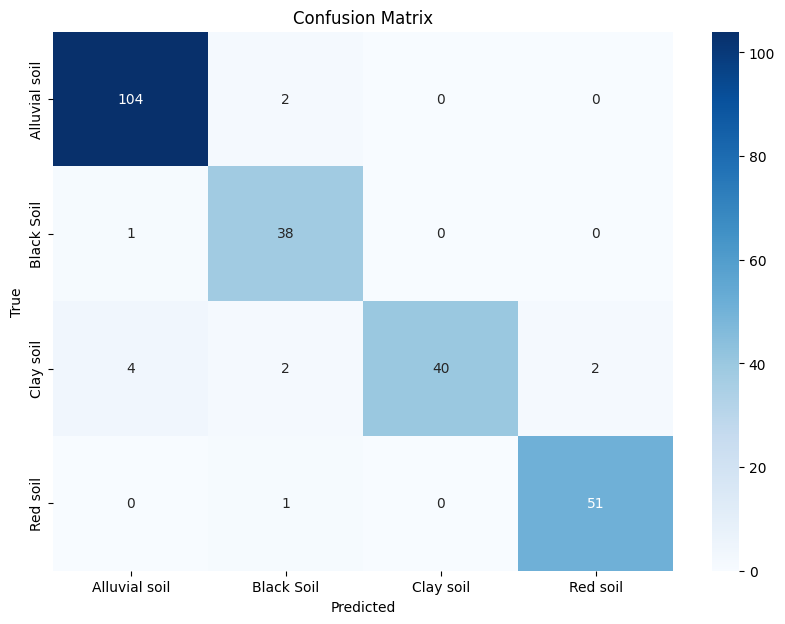

In [9]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Print classification report for detailed precision, recall, f1-score per class
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

saving the model

In [10]:
import joblib

joblib.dump((clf, le), 'soil_rf_model.joblib')
print("Fine-tuned Model and LabelEncoder saved at 'soil_rf_model.joblib'")

Fine-tuned Model and LabelEncoder saved at 'soil_rf_model.joblib'
